# Healthcare
## Capstone_project 02

In [1]:
# First Importing the Necessary library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# Now ingnoring the filterwarnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Now Importing the dataset to perform further action.
health_df = pd.read_csv("health care diabetes.csv")

In [4]:
health_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
health_df.shape

(768, 9)

In [6]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Project Task: Week 1
## Data Exploration

### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

### • Glucose

### • BloodPressure

### • SkinThickness

### • Insulin

### • BMI

In [7]:
health_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above descriptive statistic table it's clear that all the field mention in the question have the zero values and this can not hold zero values so it's clear that it is showing the missing values.

In [8]:
# So the missing values in all the filled.
print("Missing values in Glucose Column is:", health_df[health_df["Glucose"]==0].shape[0])
print("Missing values in BloodPressure Column is:", health_df[health_df["BloodPressure"]==0].shape[0])
print("Missing values in SkinThickness Column is:", health_df[health_df["SkinThickness"]==0].shape[0])
print("Missing values in Insulin Column is:", health_df[health_df["Insulin"]==0].shape[0])
print("Missing values in BMI Column is:", health_df[health_df["BMI"]==0].shape[0])

Missing values in Glucose Column is: 5
Missing values in BloodPressure Column is: 35
Missing values in SkinThickness Column is: 227
Missing values in Insulin Column is: 374
Missing values in BMI Column is: 11


### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

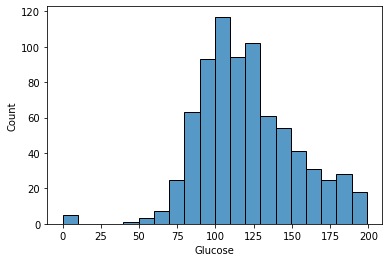

In [9]:
# Exploring these variable using the histogram.
sns.histplot(health_df.Glucose, bins=20)
plt.show()

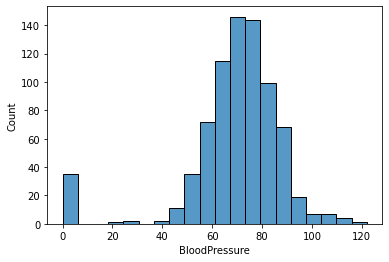

In [10]:
sns.histplot(health_df.BloodPressure, bins=20)
plt.show()

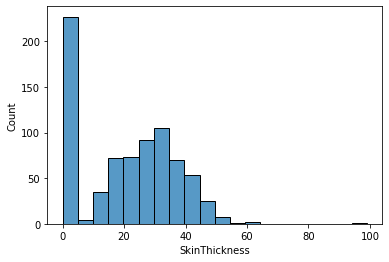

In [11]:
sns.histplot(health_df.SkinThickness, bins=20)
plt.show()

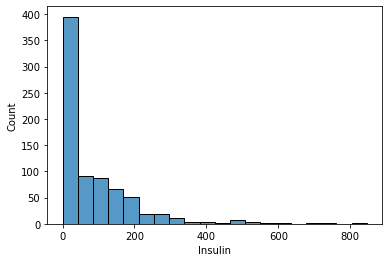

In [12]:
sns.histplot(health_df.Insulin, bins=20)
plt.show()

It is clear from the above histogram SkinThickness and insulin column is positve skewed because most of the value is 0 that mean missing values, it is necessary to treat them for better result.

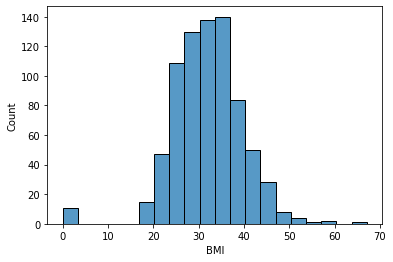

In [13]:
sns.histplot(health_df.BMI, bins=20)
plt.show()

In [14]:
# Treating the missing values by mean.
health_df["Glucose"].replace(0, health_df["Glucose"].mean(), inplace=True)
health_df["BloodPressure"].replace(0, health_df["BloodPressure"].mean(), inplace=True)
health_df["SkinThickness"].replace(0, health_df["SkinThickness"].mean(), inplace=True)
health_df["Insulin"].replace(0, health_df["Insulin"].mean(), inplace=True)
health_df["BMI"].replace(0, health_df["BMI"].mean(), inplace=True)

### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

<AxesSubplot:>

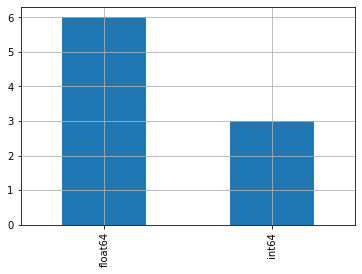

In [15]:
health_df.dtypes.value_counts().plot(kind='bar', grid='dark')

## Project Task: Week 2
## Data Exploration

### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

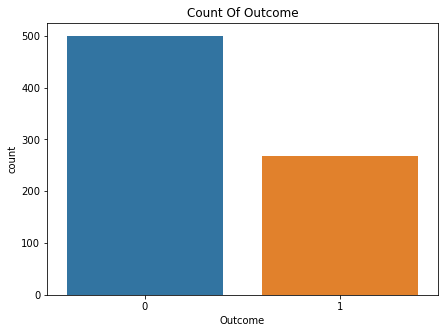

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(health_df["Outcome"])
plt.title("Count Of Outcome")
plt.show()

### Findings:-
It is clear from the above plotting of the count of outcome that the number of people who is non diabetic is double in number of diabetic person. That mean data is highly skewed and to balanced the data set we need to apply oversampling technique because we have less data.

So we are using the SMOTE(Synthetic Minority Oversampling Technique) which generate new data points by interpolation technique.

In [17]:
# First need to instsll imblanced library
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [18]:
# Lets apply the smote over sampling technique.
from imblearn.over_sampling import SMOTE

In [19]:
# Seperating the input and target variable from the dataset.
health_df_x = health_df.iloc[:, :-1]
health_df_y = health_df[["Outcome"]]

In [20]:
# output before resampling.
print(health_df_y.shape)
health_df_y.value_counts()

(768, 1)


Outcome
0          500
1          268
dtype: int64

In [21]:
smt = SMOTE()

In [22]:
x_train_sm, y_train_sm = smt.fit_resample(health_df_x, health_df_y)

In [23]:
# output after resampling.
print(y_train_sm.shape)
y_train_sm.value_counts()

(1000, 1)


Outcome
0          500
1          500
dtype: int64

### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [24]:
# Now we have the balanced data set.
health_resampled = pd.concat([x_train_sm, y_train_sm], axis=1)
print(health_resampled.shape)
health_resampled.head()

(1000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


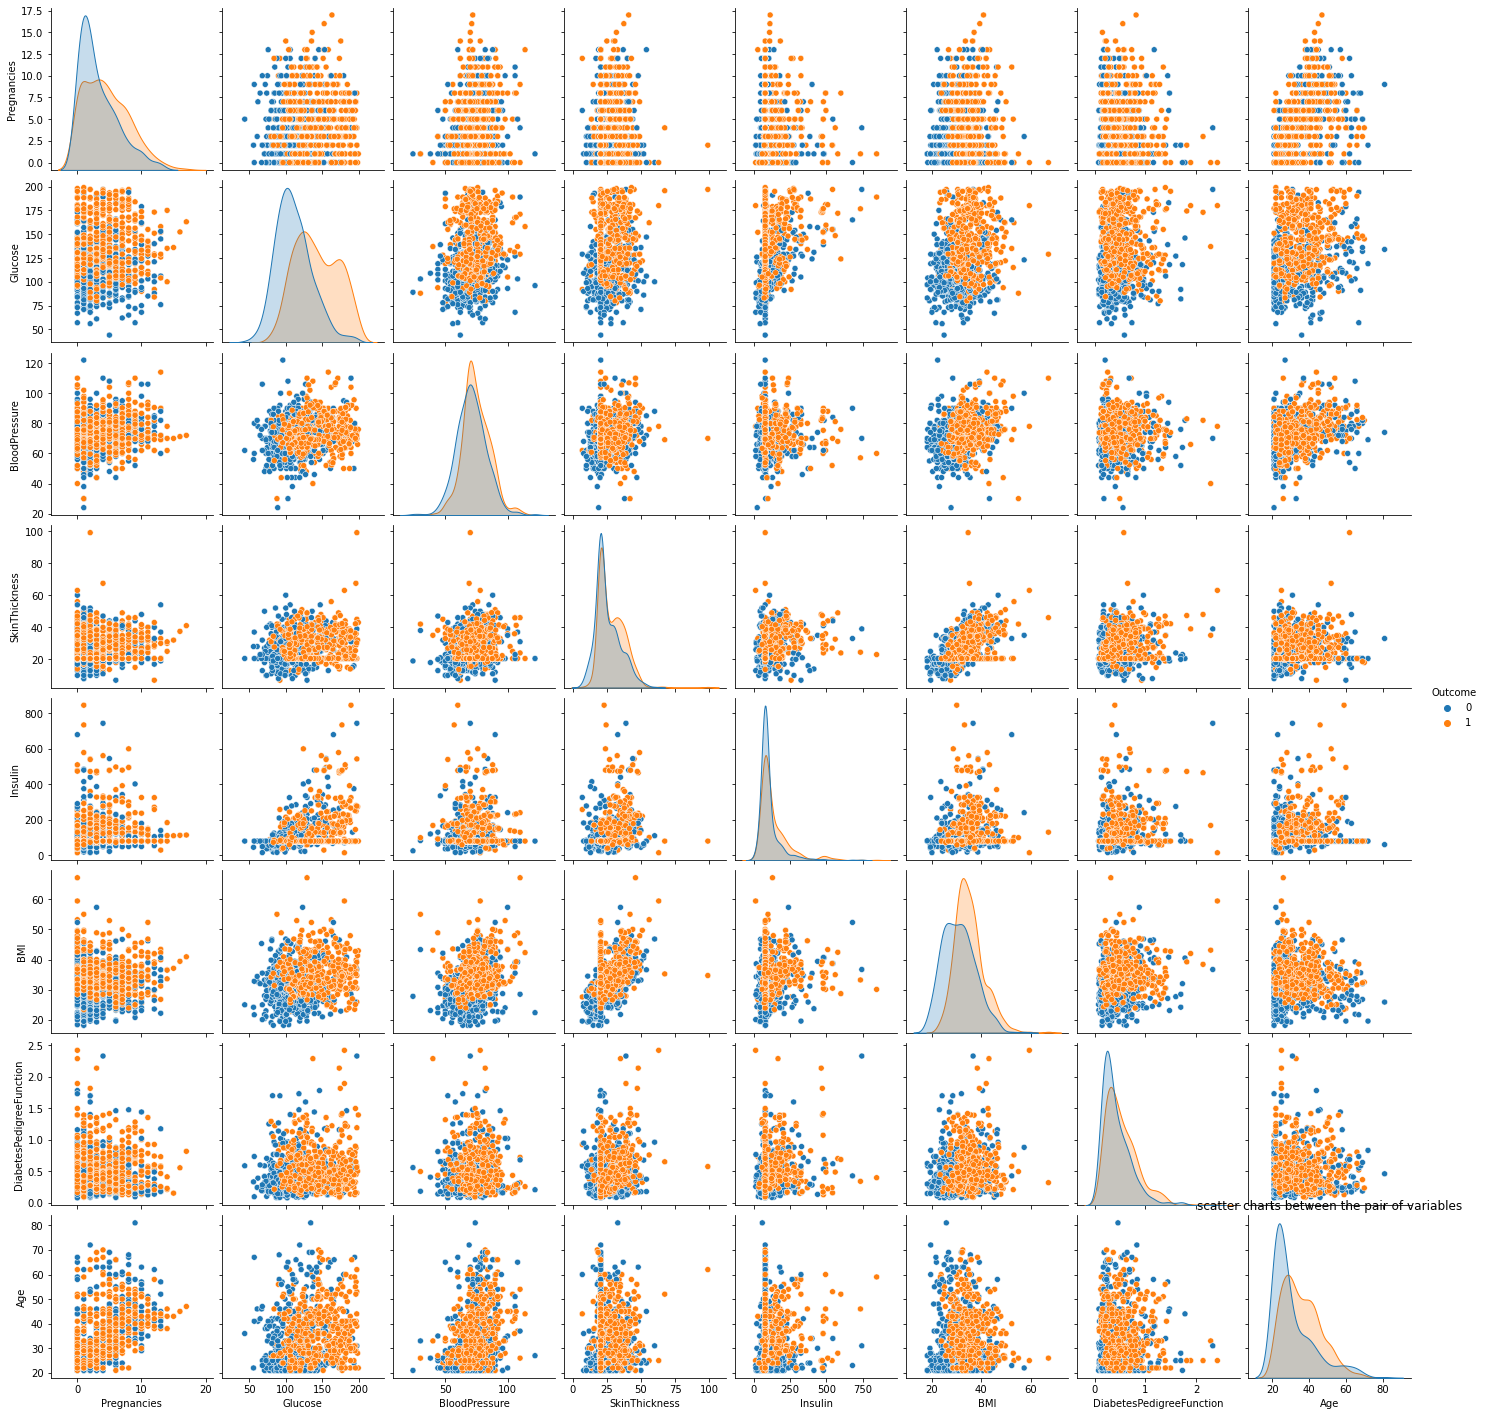

In [25]:
sns.pairplot(health_resampled, hue='Outcome')
plt.title("scatter charts between the pair of variables")
plt.show()

### Findings:-
Some intrestings findings from the above scatter chart that showing the relationship between pair of variable.
1. Not a single variable is able to distinguish the outcome variable very clear.
2. It is clear we have to use all the variable to get the opitmul output.

### 3. Perform correlation analysis. Visually explore it using a heat map.

In [26]:
health_corr = health_resampled.corr()
health_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.115815,0.197496,-0.000279,-0.019058,-0.001921,-0.052130,0.534388,0.187339
Glucose,0.115815,1.000000,0.209952,0.153199,0.382854,0.231967,0.130140,0.258213,0.498151
BloodPressure,0.197496,0.209952,1.000000,0.132316,0.026765,0.277277,0.001972,0.336288,0.163941
SkinThickness,-0.000279,0.153199,0.132316,1.000000,0.266899,0.525430,0.182729,0.019435,0.177045
Insulin,-0.019058,0.382854,0.026765,0.266899,1.000000,0.178441,0.162858,0.061553,0.171619
BMI,-0.001921,0.231967,0.277277,0.525430,0.178441,1.000000,0.146462,0.020212,0.327071
DiabetesPedigreeFunction,-0.052130,0.130140,0.001972,0.182729,0.162858,0.146462,1.000000,0.008123,0.170166
Age,0.534388,0.258213,0.336288,0.019435,0.061553,0.020212,0.008123,1.000000,0.211994
Outcome,0.187339,0.498151,0.163941,0.177045,0.171619,0.327071,0.170166,0.211994,1.000000


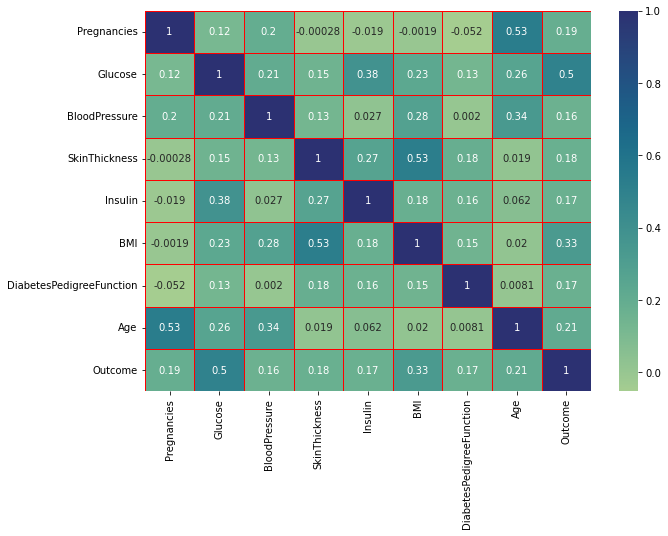

In [27]:
# Lets explore it using the heat map.
plt.figure(figsize=(10,7))
sns.heatmap(health_corr, annot=True, cmap="crest", linecolor='red', linewidths=1)
plt.show()

## Project Task: Week 3
## Data Modeling:

### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

#### Answere:-
My strategies for model building, so that i can come out with valid framework. First this is the classification problem and always we need keep in mind that whether the problem is supervised or unsupervised, we never can't relay on one algorithm.
so we will perform diffrent algorithm and come out with best model that give us good accuracy.
The algorithm which we perform here.
1. Logistic Regression
2. Naive Bayes
3. Support Vector Machine (SVM)
4. K-Nearest Neighbour (KNN)
5. Decision Tree
6. RandomForest Classifier
7. AdaBoost Classifier
8. Gradient Boosting (XGBClassifier)

In [28]:
# importing the library to split the dataset into train and test.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,average_precision_score,f1_score,confusion_matrix,classification_report,auc,roc_curve,roc_auc_score

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size = .20, random_state=10)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 8)
(200, 8)
(800, 1)
(200, 1)


### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

### 1. Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
# Fit the train test data into the model.
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
lr.score(x_train,y_train)

0.7325

In [35]:
# Now predict the test data.
y_pred = lr.predict(x_test)

In [36]:
lr.score(x_test, y_test)

0.76

AUC: 0.853


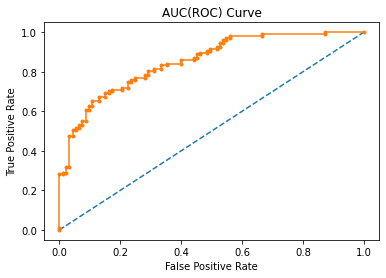

In [37]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by the plotting it.
probs = lr.predict_proba(x_test)
# Just taking the probability of happing the outcome positively.
probs = probs[:, 1]

# Area under the curve.
auc_lr = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_lr)

# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [38]:
# Let's Create the variable with empty list and append the score and model name and auc to compare in the end
model = []
model_score = []
model_auc = []

In [39]:
model.append("LR")
model_score.append(lr.score(x_test, y_test))
model_auc.append(auc_lr)

### 2. Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
gb = GaussianNB()

In [42]:
# now fir train data into the model.
gb.fit(x_train, y_train)

GaussianNB()

In [43]:
# Accuracy of the train data set by Naive Bayes algorithm
score = gb.score(x_train, y_train)
score

0.7275

In [44]:
y_pred_gb = gb.predict(x_test)

In [45]:
# Accuracy of test data set by Naive Bayes algorithm
gb.score(x_test, y_test)

0.73

AUC: 0.817


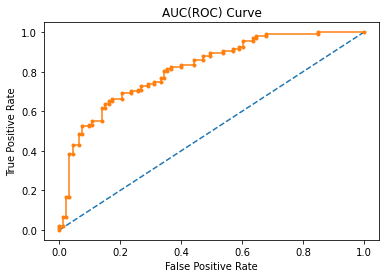

In [46]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by the plotting it.
probs = gb.predict_proba(x_test)

# Just taking the probability of happing the outcome positively.
probs = probs[:, 1]

# Area under the curve.
auc_gb = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_gb)

# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [47]:
model.append("GB")
model_score.append(gb.score(x_test, y_test))
model_auc.append(auc_gb)

### 3. Support Vector Machine (SVM) Algorithm

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC()

# Fit the train data set into the model 
svm.fit(x_train, y_train)

SVC()

In [50]:
# Accuracy of the train data set by Support Vector Machine (SVM) Algorithm
svm.score(x_train, y_train)

0.73375

In [51]:
y_pred_svm = svm.predict(x_test)

In [52]:
# Accuracy of the test data set by Support Vector Machine (SVM) Algorithm
svm.score(x_test, y_test)

0.7

#### Optimizing the parameter by RandomizedSearchCV and also evalutaing the performance

In [53]:
from sklearn.model_selection import RandomizedSearchCV

param = {"kernel": ["linear", "poly"]}
svm=SVC()
folds = 5

model_cv = RandomizedSearchCV(estimator = svm,
                             param_distributions = param,
                             n_iter = 5,
                             scoring= "f1",
                             cv = folds,
                             return_train_score = True,
                             verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'kernel': ['linear', 'poly']},
                   return_train_score=True, scoring='f1', verbose=1)

In [54]:
model_cv.best_params_

{'kernel': 'linear'}

In [60]:
svm = SVC(kernel="linear", probability=True)
svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [61]:
svm.score(x_train, y_train)

0.73375

In [62]:
y_pred_svm = svm.predict(x_test)

In [63]:
svm.score(x_test, y_test)

0.75

AUC: 0.853


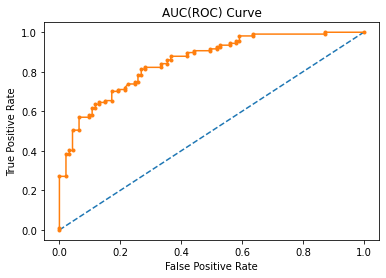

In [64]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by the plotting it.
probs = svm.predict_proba(x_test)

# Just taking the probability of happing the outcome positively.
probs = probs[:, 1]

# Area under the curve.
auc_svm = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_svm)

# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [65]:
model.append("SVM")
model_score.append(svm.score(x_test, y_test))
model_auc.append(auc_svm)

### 4. K-Nearest Neighbour (KNN)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier()

In [67]:
knn_cl.fit(x_train, y_train)

KNeighborsClassifier()

In [68]:
knn_cl.score(x_train, y_train)

0.83625

In [70]:
knn_cl.score(x_test, y_test)

0.715

#### Optimizing the parameter by GridSearchCV and also evalutaing the performance

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param = {"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]}

knn_cl = KNeighborsClassifier()
folds = 5

model_cv = GridSearchCV(estimator = knn_cl,
                             param_grid = param,
                             scoring= "f1",
                             cv = folds,
                             return_train_score = True,
                             verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18]},
             return_train_score=True, scoring='f1', verbose=1)

In [75]:
model_cv.best_params_

{'n_neighbors': 3}

In [76]:
knn_cl = KNeighborsClassifier(n_neighbors = 3)

In [77]:
knn_cl.fit(x_train, y_train).score(x_train, y_train)

0.88375

In [78]:
y_pred_knn = knn_cl.predict(x_test)

In [79]:
knn_cl.score(x_test, y_test)

0.765

AUC: 0.816


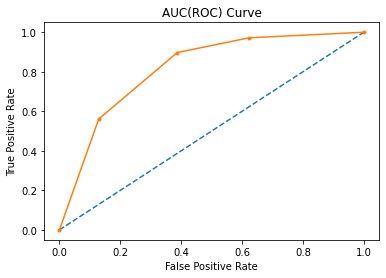

In [80]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by the plotting it.
probs = knn_cl.predict_proba(x_test)

# Just taking the probability of happing the outcome positively.
probs = probs[:, 1]

# Area under the curve.
auc_knn = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_knn)

# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [81]:
model.append("KNN")
model_score.append(knn_cl.score(x_test, y_test))
model_auc.append(auc_knn)

### 5. Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtc1 = DecisionTreeClassifier()

In [116]:
dtc1.fit(x_train, y_train)

DecisionTreeClassifier()

In [117]:
dtc1.score(x_train, y_train)

1.0

In [118]:
dtc1.score(x_test, y_test)

0.735

#### Optimizing the parameter by GridSearchCV and also evalutaing the performance.

In [119]:
# Now performing the hperparameter tuning.
dtc = DecisionTreeClassifier()

params = {'criterion': ["gini", "entropy"],
          'min_samples_leaf' : [2,3,4,5,6,7,8,9],
         "max_depth": [2,3,4,5,6,7,8,9]}

# Cross Validation 
folds = 5

model_cv = GridSearchCV(estimator = dtc,
                       param_grid = params,
                       scoring= "f1",
                        cv = folds,
                       verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1', verbose=1)

In [120]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7}

In [125]:
dtc2 = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, min_samples_leaf = 7)

In [126]:
dtc2.fit(x_train, y_train).score(x_train, y_train)

0.79375

In [127]:
y_pred_dtc2 = dtc2.predict(x_test)

In [128]:
dtc2.score(x_test, y_test)

0.78

AUC: 0.843


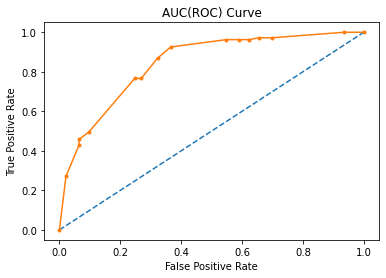

In [133]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by the plotting it.
probs = dtc2.predict_proba(x_test)

# Just taking the probability of happing the outcome positively.
probs = probs[:, 1]

# Area under the curve.
auc_dtc2 = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_dtc2)

# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [147]:
model.append("DTC")
model_score.append(dtc2.score(x_test, y_test))
model_auc.append(auc_dtc2)

### 6. RandomForest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc1 = RandomForestClassifier()

In [136]:
rfc1.fit(x_train, y_train)

RandomForestClassifier()

In [137]:
rfc1.score(x_train, y_train)

1.0

In [138]:
rfc1.score(x_test, y_test)

0.855

#### Optimizing the parameter by GridSearchCV and also evalutaing the performance.

In [139]:
params = {"n_estimators": [100,200,300],
         'criterion': ["gini", "entropy"],
         "max_depth": [3,4,5,6]}

# cross Validation 
folds = 5
model_cv = GridSearchCV(estimator=rfc1,
                       param_grid=params,
                       scoring= "f1",
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='f1', verbose=1)

In [140]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 300}

In [141]:
# Now fit the optimul parameter in the model.
rfc2 = RandomForestClassifier(criterion = 'gini', max_depth = 6, n_estimators = 300)

In [142]:
rfc2.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=300)

In [143]:
rfc2.score(x_train, y_train)

0.8675

In [144]:
y_pred_rfc = rfc2.predict(x_test)

In [145]:
rfc2.score(x_test, y_test)

0.805

AUC: 0.901


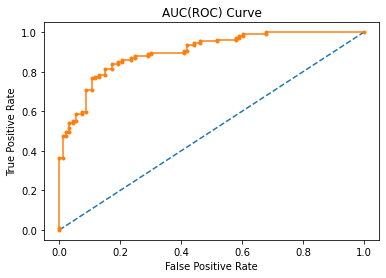

In [146]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by the plotting it.
probs = rfc2.predict_proba(x_test)

# Just taking the probability of happing the outcome positively.
probs = probs[:, 1]

# Area under the curve.
auc_rfc = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_rfc)

# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [148]:
model.append("RFC")
model_score.append(rfc2.score(x_test, y_test))
model_auc.append(auc_rfc)

### 7. AdaBoost Classifier

In [150]:
# Import the Adaboost Classifier 
from sklearn.ensemble import AdaBoostClassifier

In [151]:
adc = AdaBoostClassifier()

In [152]:
adc.fit(x_train, y_train)

AdaBoostClassifier()

In [154]:
adc.score(x_train, y_train)

0.82375

In [155]:
adc.score(x_test, y_test)

0.795

#### Optimizing the parameter by GridSearchCV and also evalutaing the performance.

In [156]:
params = {'n_estimators':[100,200,300,400,500,700,1000]}

# cross Validation 
folds = 5
model_cv = GridSearchCV(estimator=adc,
                       param_grid=params,
                       scoring= "f1",
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 700, 1000]},
             return_train_score=True, scoring='f1', verbose=1)

In [157]:
model_cv.best_params_

{'n_estimators': 400}

In [158]:
adc2 = AdaBoostClassifier(n_estimators = 400)

In [159]:
adc2.fit(x_train, y_train).score(x_train, y_train)

0.915

In [160]:
y_pred_adc = adc2.predict(x_test)

In [161]:
adc2.score(x_test, y_test)

0.78

AUC: 0.828


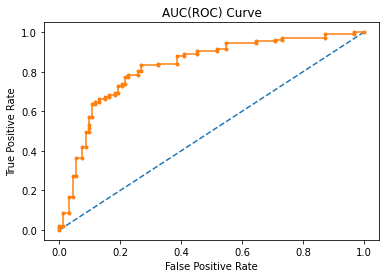

In [162]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by the plotting it.
probs = adc2.predict_proba(x_test)

# Just taking the probability of happing the outcome positively.
probs = probs[:, 1]

# Area under the curve.
auc_adc = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_adc)

# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [164]:
model.append("ADC")
model_score.append(adc2.score(x_test, y_test))
model_auc.append(auc_adc)

### 8. Gradient Boosting (XGBClassifier)

In [165]:
from xgboost import XGBClassifier

In [167]:
xgb = XGBClassifier()

In [168]:
# hyper parameter tuning for the optimul parameter for xgboost clasifier 
param = {'n_estimators': range(8, 20),
         'max_depth': range(6, 10),
         'learning_rate': [.4, .45, .5, .55, .6]}

# Cross Validation
folds = 5

model_cv = GridSearchCV(estimator = xgb,
                       param_grid = param,
                       scoring = "accuracy",
                       cv = folds,
                       verbose = 1)

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [169]:
model_cv.best_params_

{'learning_rate': 0.6, 'max_depth': 8, 'n_estimators': 15}

In [170]:
xgb2 = XGBClassifier(learning_rate = 0.6, max_depth= 8, n_estimators= 15)

In [171]:
xgb2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [172]:
xgb2.score(x_train, y_train)

1.0

In [173]:
y_pred_xgb = xgb2.predict(x_test)

In [174]:
xgb2.score(x_test, y_test)

0.835

AUC: 0.879


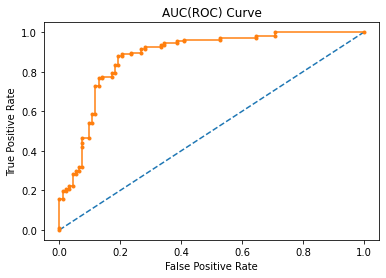

In [175]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by the plotting it.
probs = xgb2.predict_proba(x_test)

# Just taking the probability of happing the outcome positively.
probs = probs[:, 1]

# Area under the curve.
auc_xgb = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_xgb)

# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)

#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [176]:
model.append("XGB")
model_score.append(xgb2.score(x_test, y_test))
model_auc.append(auc_xgb)

In [177]:
models_detail = pd.DataFrame(zip(model, model_score, model_auc), columns = ["Model", "Accuracy", "AUC"])
models_details = models_detail.set_index("Model")

In [178]:
models_details

,Accuracy,AUC
Model,,
LR,0.760,0.853080
GB,0.730,0.816501
SVM,0.750,0.853181
KNN,0.765,0.816451
DTC,0.780,0.843131
RFC,0.805,0.901216
ADC,0.780,0.827656
ADC,0.780,0.879108


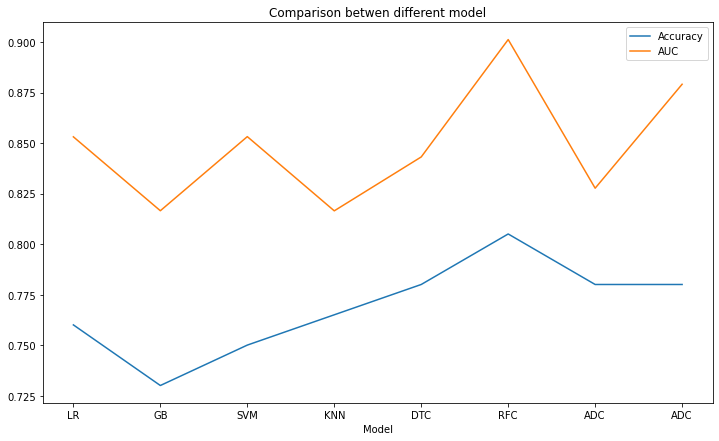

In [182]:
models_details.plot(figsize=(12,7))
plt.title("Comparison betwen different model")
plt.legend()
plt.show()

### From the various model after analysis the good model Random Forest Classifier on basis of Maximum Accuracy and AUC values.

In [183]:
Final_model = rfc2

## Project Task: Week 4
## Data Modeling:

### 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [184]:
from sklearn.metrics import classification_report

In [185]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77        93
           1       0.78      0.88      0.83       107

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



In [192]:
confusion = confusion_matrix(y_test, Final_model.predict(x_test))

In [193]:
confusion

array([[67, 26],
       [13, 94]], dtype=int64)

In [195]:
# True Positive
TP = confusion[1,1]

# True Negatives
TN = confusion[0,0] 

# False Positives
FP = confusion[0,1]

# False Negatives
FN = confusion[1,0] 

In [196]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                  
Specificity = TN/(TN+FP)

### Accuracy:- 
Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset. The best accuracy is 1.0, whereas the worst is 0.0.
### Precision:-
Precision is calculated by dividing the true positives by anything that was predicted as a positive.
### Sensitivity:-
Sensitivity is calculated as the number of correct positive predictions divided by the total number of positives. It is also called recall (REC) or true positive rate (TPR). The best sensitivity is 1.0, whereas the worst is 0.0.
### AUC:-
AUC stand for the area under the curve that we got from roc(Receiver Operating Characteristics) curve.

In [202]:
print("Accuracy:", Accuracy)
print("Precision: %.3f" %Precision)
print("Sensitivity: %.3f" %Sensitivity)
print("Specificity: %.3f" %Specificity)
print("AUC: %.3f" %auc_rfc)

Accuracy: 0.805
Precision: 0.783
Sensitivity: 0.879
Specificity: 0.720
AUC: 0.901


### Data Reporting:

#### 2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart. 

# For dashboard please refer the tableau file which is created for data reporting.